In [1]:
# Getting the prices for Apple
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

start = datetime(2015, 1, 1)
end = datetime(2018, 1, 1)

Symbols = ['AAPL']

df = pd.DataFrame()

for sym in Symbols:
    df[sym] = web.DataReader(sym,'iex', start, end)['open']
df.head()

5y


,AAPL
date,
2015-01-02,104.2471
2015-01-05,101.3459
2015-01-06,99.7082
2015-01-07,100.3258
2015-01-08,102.2257


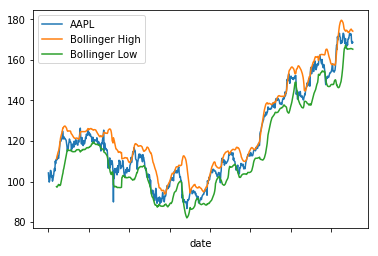

In [2]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['AAPL'].rolling(window).mean()
rolling_std = df['AAPL'].rolling(window).std()

#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

df[['AAPL','Bollinger High','Bollinger Low']].plot()


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


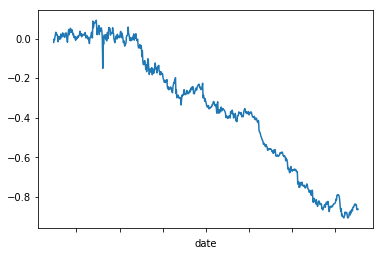

In [3]:
#Create an "empty" column as placeholder for our /position signals
df['Position'] = None

#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(df)):
    
    if (df['AAPL'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['AAPL'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
        df['Position'].iloc[row] = -1
        
    if (df['AAPL'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['AAPL'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
        df['Position'].iloc[row] = 1  

#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['Position'].fillna(method='ffill',inplace=True)

#Calculate the daily market return and multiply that by the position to determine strategy returns
df['Market Return'] = np.log(df['AAPL'] / df['AAPL'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['Position']

#Plot the strategy returns
plt.figure()
df['Strategy Return'].cumsum().plot()

In [4]:
print('Negative Alpha through Bollingerband strategy for Apple over 2015 to 2017')

Negative Alpha through Bollingerband strategy for Apple over 2015 to 2017
